# Exploring the Impact of Players’ Experience and Age on Playing Hours in Playcraft

## Introduction
“Minecraft is a game made up of blocks, creatures, and community. You can survive the night or build a work of art – the choice is all yours.” - Per Landin, creative communications assistant of Minecraft. Minecraft is a sandbox game developed by Mojang Studio in 2009. It was published in 2011 and originally built through Java, quickly becoming one of the most popular games among children and adults. It has also been nominated for multiple awards by the British Academy Games Award for Multiplayer (BAFTA), winning the 'BAFTA Games Award for Best Family Game' in 2015 and 'BAFTA Children's Award' in 2016.

Video games are becoming more and more popular in today’s society; over time, there have been an increasing number of studies that focus on the relationship between the players’ background and their participation and behavior in the game. For example, 'Motivations for video game play: Predictors of time spent playing', a journal article that focused on evaluating the possible factors that affect the video game playing time for different players. Another article that focused on investigating the relationship between video games and well-being, 'Video game play is positively correlated with well-being'. Exploring how players’ experience in Minecraft and age can affect the players’ hours logged is a topic that has not yet been explored in this research field. Since the players’ experience can strongly affect the experience and satisfaction of the gaming experience, and age can affect the knowledge and experiences, we plan to focus on predicting the possible playing hours logged by each player based on these two factors. 

Plaicraft is a “free Minecraft in the cloud” operated by the Pacific Laboratory for Artificial Intelligence (PLAI) of the University of British Columbia. The purpose is to collect players’ behavior and actions in Minecraft. This research will be done using the data collected by this cloud Minecraft game.

**Question: Can the experience and ages of the players predict their playing hours in Plaicraft?**

This is based off of Question #1: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts. We would like to do predictive analysis using knn regression where experience level and age are predictor variables, and playing hours is the response variable.

There were two datasets given to us. 1. The 'players' dataset contains a list of all unique players, including data about each player. 2. The'sessions' dataset contains a list of individual play sessions by each player, including data about the session. We chose the ‘players’ dataset for our analysis. To answer this question appropriately, it is much more efficient to use only the ‘players’ dataset and disregard the ‘sessions’ dataset because it does not give us any valuable information regarding the demographics of the player contributing to the data. There are nine variables and 196 observations in the ‘players’ dataset. The variables are:

| Variable Name | Datatype | Explanation |
| ----------- | ----------- |----------- |
| `experience` | \<chr\> | This variable tells us the level of experience of each player. (Beginner, Amateur, Regular, Pro, Veteran)|
| `subscribe` | \<lgl\> | This variable is a logical value (TRUE/FALSE) that tells us if the player has subscribed to PlaiCraft's email updates or not.|
| `hashedEmail` | \<chr\>| This variable shows the hashed version of the email ID the player has provided to sign up for PLAICraft.|
| `played_hours`| \<dbl\>| This variable gives us the number of hours spent by each player on the game.|
| `name`| \<chr\>| This variable gives us the name of each player.|
| `gender`| \<chr\>| This variable gives us the gender of each player.|
| `age`| \<dbl\>| This variable gives us the age of each player.|
| `individualId`| \<lgl\> | This variable gives us each player's unique individual ID.|
| `organizationName`| \<lgl\> | This variable gives us the organization that each player belongs to.|


## Method & Results 

This section details the methods and reasoning behind our code at every step. First, we use different methodologies to wrangle our data, increase readability and make it easier to analyze. Next we plot the data into several forms relevant to our question. This gives us an initial look at the possible relationships based on which we structure our prediction model. After this basic visualization, we apply the concept of KNN regression to our data to use the age and experience factors to predict the played hours. Then, we test this prediction model that has been created to predict the played hours on the testing dataset. Finally, we obtain the result of our analysis and the effectiveness of the model using the RMSE value. Further detail for each step has been clarified before every code.

First we load the standard R packages required for the specific functionality we want.

In [1]:
library(tidyverse)
library(tidymodels)
set.seed(1005)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Since we are sourcing our data from a remote csv file without downloading it locally, we use the `read_csv` method to load our data.

In [2]:
player <- read_csv("https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz")


Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


We use the `select` method to choose the variables specifically used for analysis. After selecting the experience variable, we convert it from its original `<chr>` type to the `<fct>` factor type using the `mutate` method to make it easier to wrangle and compute our data. This means our experience string values now have integer values corresponding to their experience level from 1 to 5.

Then we split our given data into training and testing data using a 75-25 split. This means that 75% of the data is used for the remaining portion of this report to train the model. The model will be trained to identify patterns between our variables and these patterns will be used to develop the accuracy of the prediction model. The remaining 25% is testing data that can be used to test the model's performance and evaluate its accuracy.

In [3]:
player_clean <- player |>
                select(experience, played_hours, age) |>
                mutate(experience_level = case_when(experience == "Veteran" ~ 5, experience == "Pro" ~ 4, 
                                                    experience == "Regular" ~ 3, experience == "Amateur" ~ 2,
                                                    experience == "Beginner" ~ 1))

player_clean$experience <- factor(player_clean$experience, levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran"))

player_spliting_clean <- initial_split(player_clean, prop = 0.75, strata = played_hours)
player_training_clean <- training(player_spliting_clean)
player_testing_clean <- testing(player_spliting_clean)
head(player_training_clean)

experience,played_hours,age,experience_level
<fct>,<dbl>,<dbl>,<dbl>
Veteran,0.0,17,5
Regular,0.1,21,3
Amateur,0.0,17,2
Amateur,0.0,21,2
Amateur,0.1,17,2
Veteran,0.0,22,5


The resulting database has 3 variables and 196 observations. The variables are:

1. `experience`: `<fct>`, The player's level of experience
2. `played_hours`: `<dbl>`, The number of hours the player spent on the game
3. `age`:`<dbl>`, The age of the player

First we use `ggplot` to create a scatter plot of our current dataset, plotting played hours vs age and using different colors to represent the experience variable. This plot serves as a complete overview of our data and is used to give us a first glance at the relationship between our variables and see if there are any obvious patterns. We also set limits on the plot to remove outliers and make the patterns clearer.

Warning message:
“Removed 13 rows containing missing values or values outside the scale range
(`geom_point()`).”


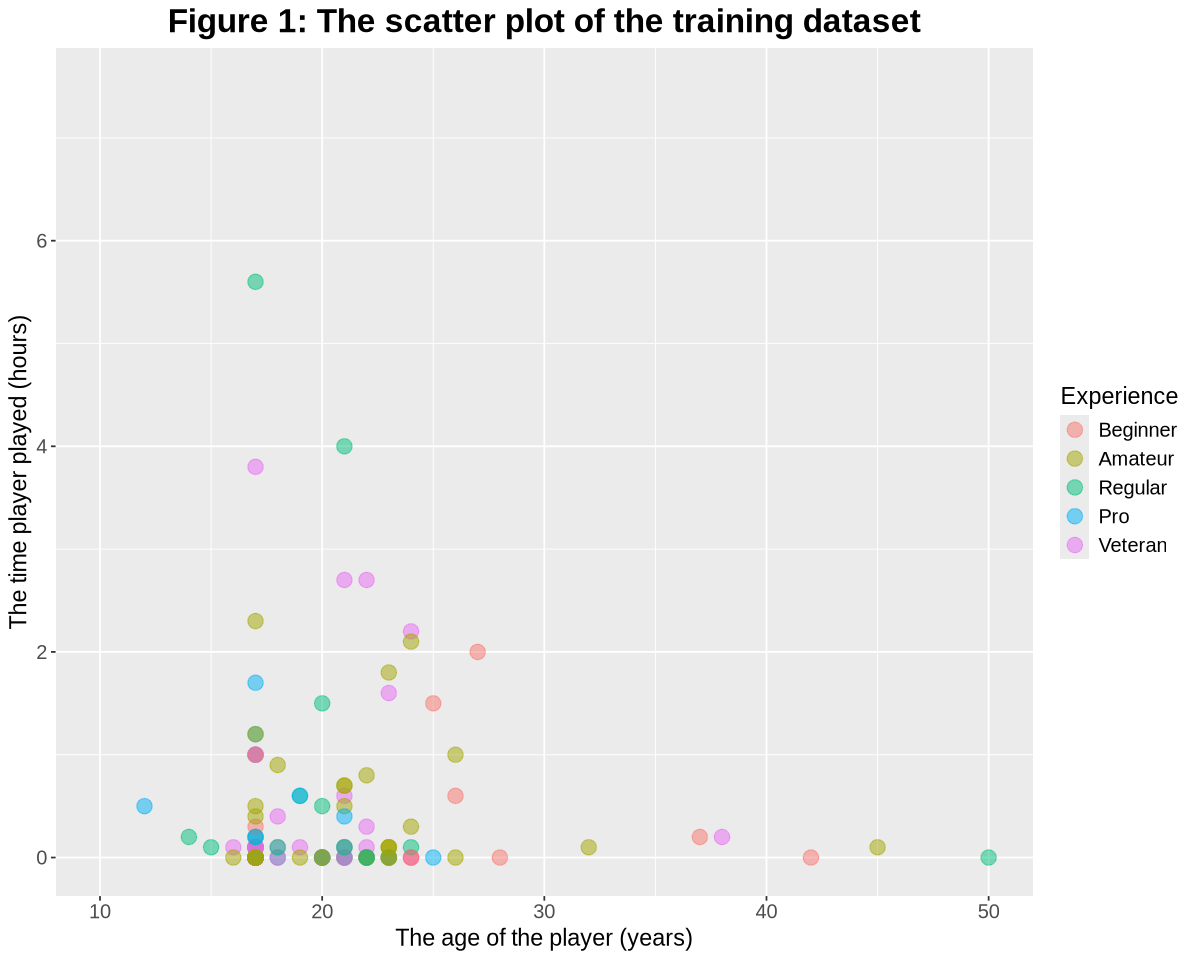

In [4]:
options(repr.plot.width = 10, repr.plot.height = 8)

player_training_clean_plot <- player_training_clean |>
                     ggplot(aes(x = age, y = played_hours, color = experience)) +
                     geom_point(alpha = 0.5, size = 4) +
                     labs(x = "The age of the player (years)",
                          y = "The time player played (hours)",
                          title = "Figure 1: The scatter plot of the training dataset",
                          color = "Experience") +
                     theme(plot.title = element_text(size = 20, hjust = 0.5, face = "bold"), ,
                           axis.title = element_text(size = 14),
                           axis.text = element_text(size = 12),
                           legend.title = element_text(size = 14),
                           legend.text = element_text(size = 12)) +
                     xlim(10,50) +
                     ylim(0,7.5)
player_training_clean_plot

*Figure 1:* 
This scatter plot shows how both predictors can affect the response variable. At first glance, there does not seem to be a relationship between experience level and time played in hours. From our current visualization, we observe that younger players tend to have higher values for the played hours. To improve, we will need to plot them separately.

Now we use `ggplot` to create a scatter plot of played hours versus age only, disregarding the experience variable.

Warning message:
“Removed 13 rows containing missing values or values outside the scale range
(`geom_point()`).”


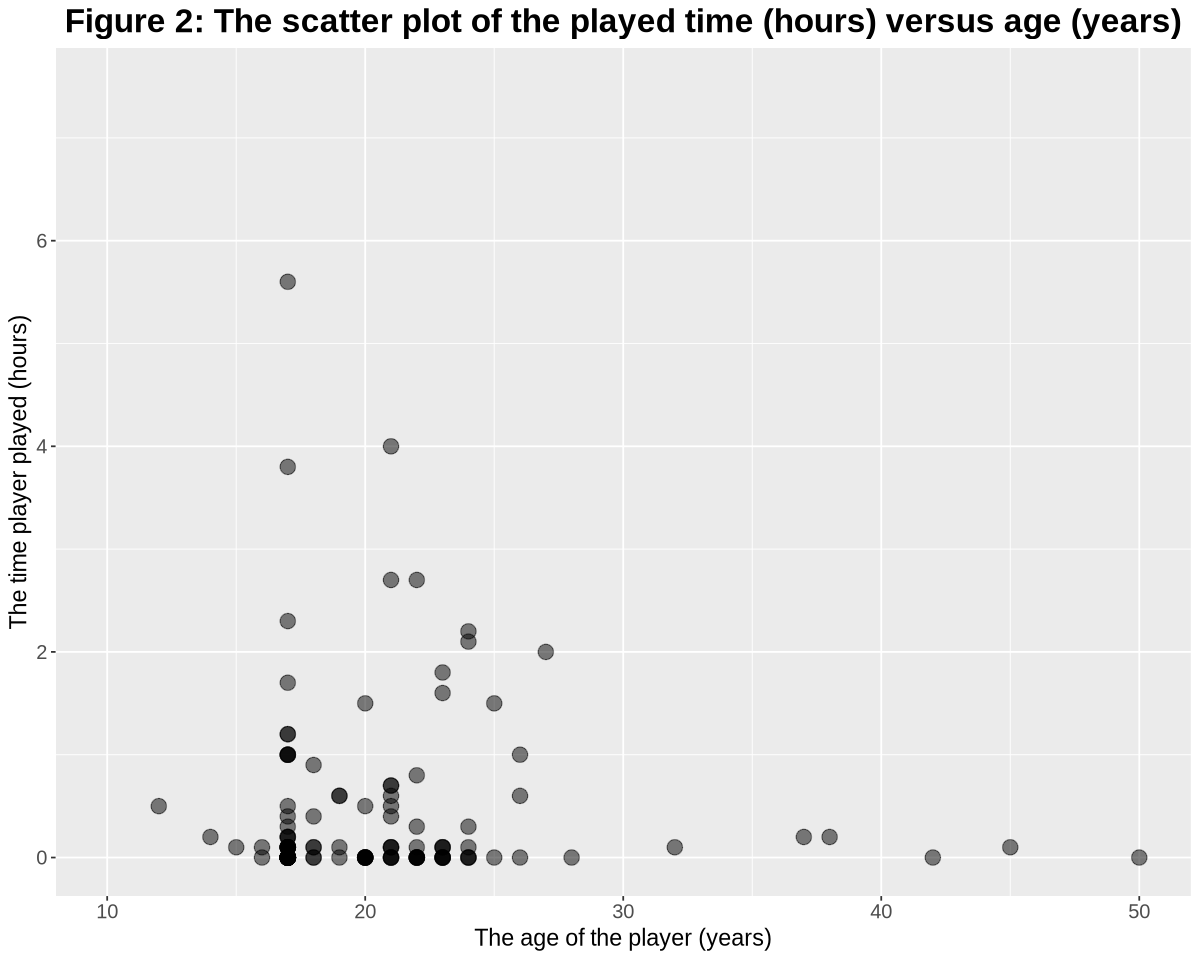

In [5]:
options(repr.plot.width = 10, repr.plot.height = 8)


age_hour_plot <- player_training_clean |>
                     ggplot(aes(x = age, y = played_hours)) +
                     geom_point(alpha = 0.5, size = 4) +
                     labs(x = "The age of the player (years)",
                          y = "The time player played (hours)",
                          title = "Figure 2: The scatter plot of the played time (hours) versus age (years)") +
                     theme(plot.title = element_text(size = 20, hjust = 0.5, face = "bold"), ,
                           axis.title = element_text(size = 14),
                           axis.text = element_text(size = 12)) +
                     xlim(10,50) +
                     ylim(0,7.5)
age_hour_plot

*Figure 2:* There doesn’t seem to be an immediate visual relationship between age and hours played. However, higher playing hour values are seen towards the left of the graph (lower age groups). Therefore, younger players tend to play for longer. 

Now we look for a relationship between the experience and played hours variables. We cannot do this directly because of outliers that would affect the overall played hours variable and create a misrepresentation of our data. So we use the average playing time because it's more reliable and useful for visualization. 

To do this, we first use a combination of the `group` and `summarize` methods to create a new data frame `experience_hour_data`. This dataframe contains 5 observations and 2 variables:

1. The `experience` variable of the type`<fct>`
2. A new variable `average_hours` that computes the average played hours for each experience variable based on all the observations in the initial dataset. It is of type `<dbl>`

After this, we use `ggplot` on the new data frame `experience_hour_data` to create a bar graph that shows plots the average hours played for each level of experience.

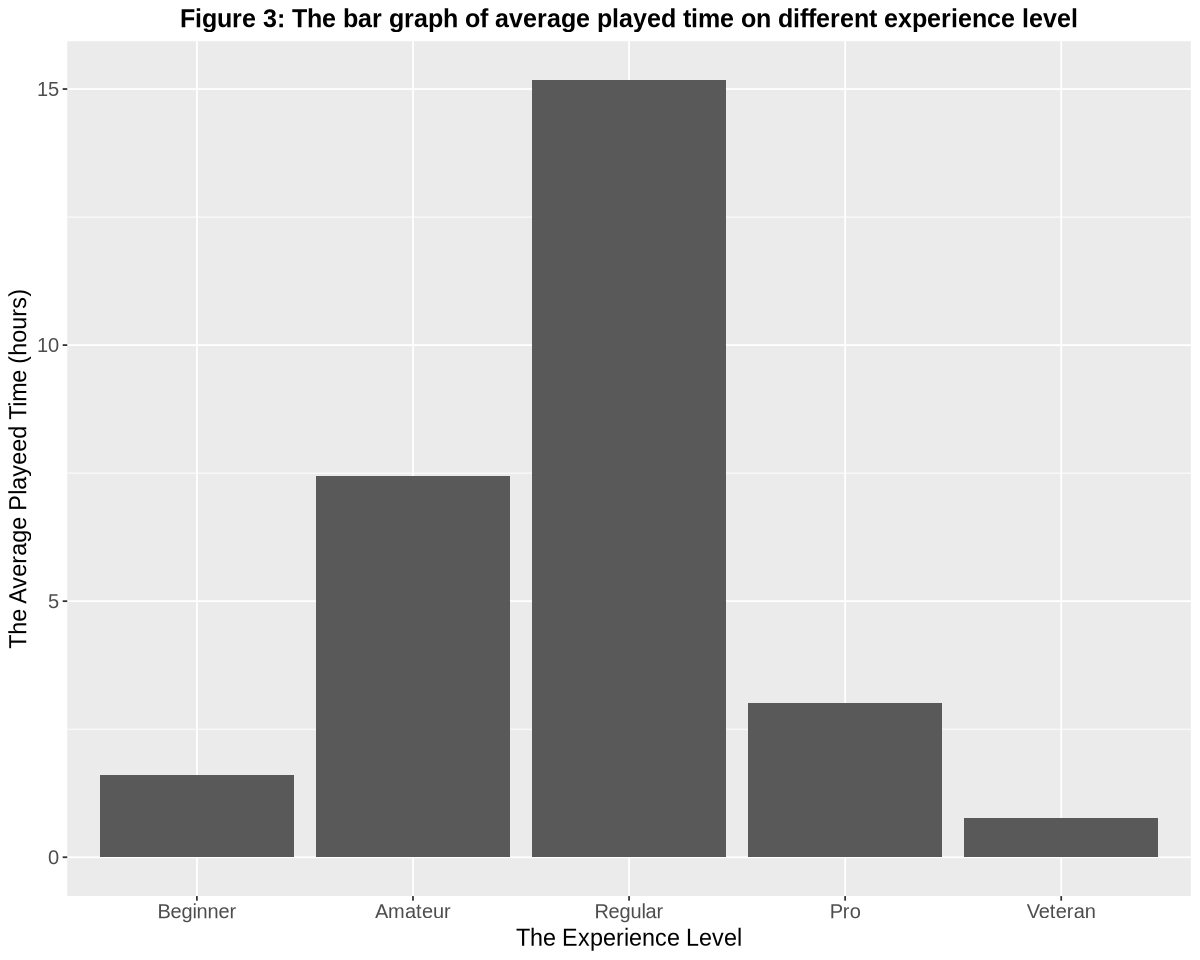

In [6]:
options(repr.plot.width = 10, repr.plot.height = 8)

experience_hour_data <- player_training_clean |>
                         group_by(experience) |>
                         summarize(average_hours =  mean(played_hours, na.rm = TRUE))

experience_hour_graph <- experience_hour_data |>
                         ggplot(aes(x = experience, y = average_hours)) +
                         geom_bar(stat = "identity") +
                         labs(x = "The Experience Level",
                              y = "The Average Playeed Time (hours)",
                              title = "Figure 3: The bar graph of average played time on different experience level") +
                         theme(plot.title = element_text(size = 15, hjust = 0.5, face = "bold"), 
                           axis.title = element_text(size = 14),
                           axis.text = element_text(size = 12))

experience_hour_graph

*Figure 3:* The above bar graph gives insight into whether there is a correlation between experience level and played hours, as measured by the average played time (in hours). We chose a bar graph as this allows us to compare counts of a categorical variable (experience). Furthermore, plotting average playing time of each group instead of overall playing time ensures the values do not stack onto one another and are unaffected by there being an unequal number of players in each category. As shown by the bar graph, the average played time significantly varies between different experience levels, which could mean that experience level affects play time and thus can be used as a predictor. 

Now we have an initial understanding of the trend between the `experience` and `played_hours` variables, and there seems to be a connection between them. We used the bar graph to see the variation of played hours among the experience levels, but this did not give us any insight into the distribution of played hours for each experience level. This is our logical next step to gain more understanding regarding the variable relationships and it can be accomplished using a box plot. A box plot is a visualization that shows the spread, range and median of the data. This can be used to compare the `experience` factors more effectively and point relationships betwene.

We use the functions `ggplot` and `geom_boxplot` to create the boxplot for every experience level.

Warning message:
“Removed 12 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


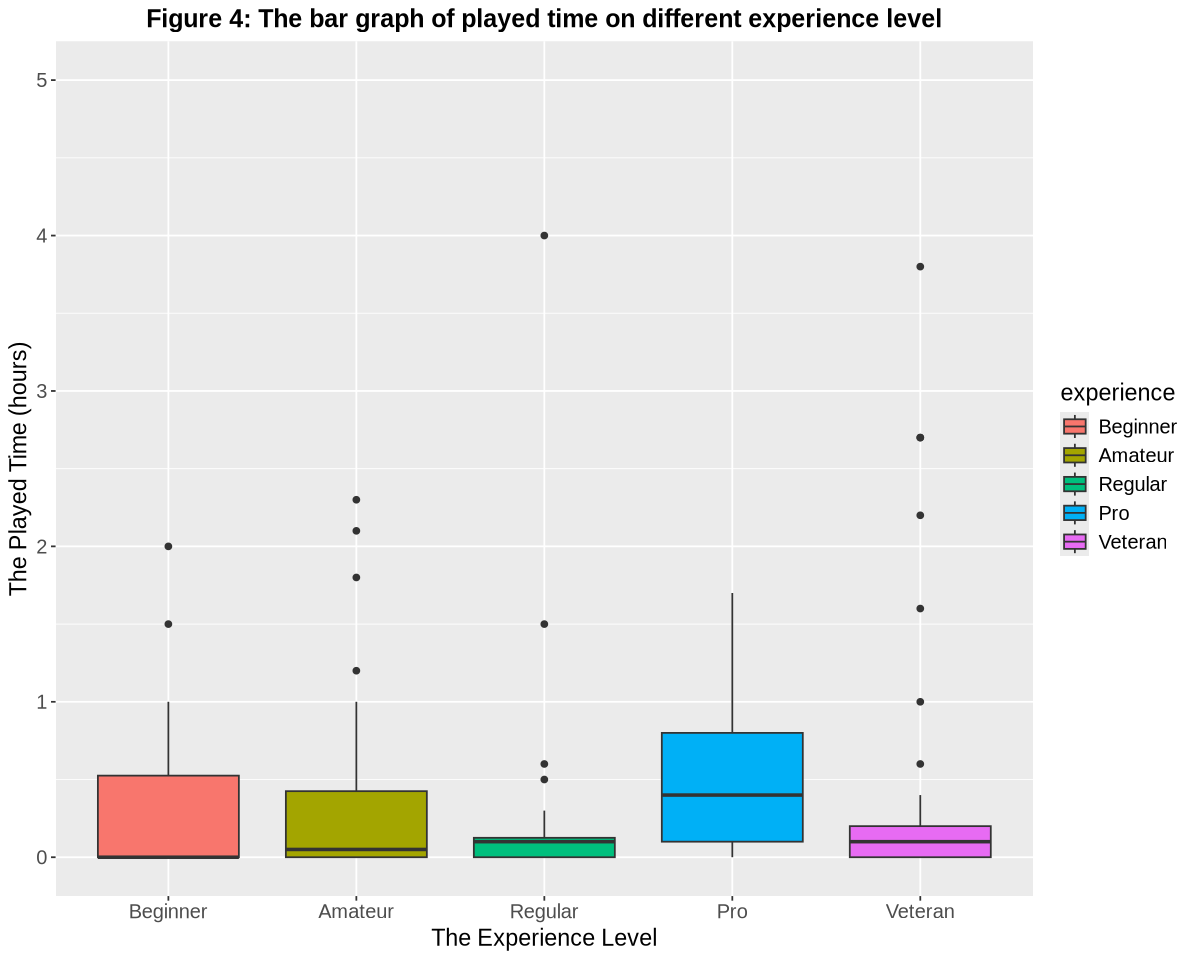

In [7]:
options(repr.plot.width = 10, repr.plot.height = 8)

experience_hour_boxplot <- player_training_clean |>
                           ggplot(aes(x = experience, y = played_hours, fill = experience)) +
                           geom_boxplot() +
                           labs(x = "The Experience Level",
                                y = "The Played Time (hours)",
                                title = "Figure 4: The bar graph of played time on different experience level") +
                           theme(plot.title = element_text(size = 15, hjust = 0.5, face = "bold"), 
                                 axis.title = element_text(size = 14),
                                 axis.text = element_text(size = 12),
                                 legend.title = element_text(size = 14),
                                 legend.text = element_text(size = 12)) +
                           ylim(0,5)
experience_hour_boxplot


*Figure 4:* We used a box plot to visualize overall played time in hours (not average) versus a player’s experience level. There seems to be an inverse-U relationship: playtime increases with experience initially (from Amateur to Beginner) and then decreases as players become more skilled (from Pro to Veteran). The trend suggests that motivation or need to play may decline as players gain experience and mastery.

Now that we have observed a trend between the variables, we can use a K-Nearest Neighbours Regression algorithm to predict an individual player's played hours based on the age and experience level variables. To perform KNN regression we take the following steps:

*1. Create a recipe*

First, a recipe `player_recipe` is created to preprocess our data before fitting it to the required model. In the recipe, we specify the variables used for prediction (age and experience) and scale & center the variables so all our variables have equal weight in the prediction process which is not affected by their actual values.

*2. Defining the specification for the KNN Regression model*

The specification `player_train_spec` is created to define the characteristics of our model. (KNN Regression with all neighbours having equal weight and an optimal value of k)

*3. Creating a cross-validation split*

Then we use k-fold cross validation on the training data to find the performance of the model for a certain value of k. In this case the dataset is divided into 5 folds, with one being used as the test set.
   
*4. Creating a workflow*

Finally, we combine the recipe and model specification into a workflow that can be used to train the model.

In [8]:
player_recipe <- recipe(played_hours ~ age + experience_level, data = player_training_clean) |>
                 step_scale(all_predictors()) |>
                 step_center(all_predictors()) 

player_train_spec <- nearest_neighbor(weight_func = "rectangular",
                                      neighbors = tune()) |>
                     set_engine("kknn") |>
                     set_mode("regression")

player_vfold <- vfold_cv(player_training_clean, v = 5, strata = played_hours)

player_train_fit <- workflow() |>
                    add_recipe(player_recipe) |>
                    add_model(player_train_spec)

 

Our next step is to use cross-validation to tune the number of neighbours used in our model specification. We do this by testing values of k from 1 to 65 and calculating the mean (Root Mean Square Error) RMSE value for each k into a data frame called `player_k`. Since lower values of RMSE indicate better model performance, we identify the value of k where RMSE is minimum (in this case, 35) and store it in the variable `k_min_value`.

In [9]:
gridvals <- tibble(neighbors = seq(from = 1, to = 65, by = 1))

player_k <- player_train_fit |>
            tune_grid(resamples = player_vfold, grid = gridvals) |>
            collect_metrics() |>
            filter(.metric == "rmse")

k_min <- player_k |>
         filter(mean == min(mean))
k_min

k_min_value <- k_min |>
               pull(neighbors)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
35,rmse,standard,22.38019,5,7.617131,Preprocessor1_Model35


Now we use our optimal value of k to build the prediction model.

In [10]:
player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min_value) |>
                     set_engine("kknn") |>
                     set_mode("regression")

player_final_fit <- workflow() |>
                    add_recipe(player_recipe) |>
                    add_model(player_spec) |>
                    fit(data = player_training_clean)

player_final_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(35,     data, 5), kernel = ~"rectangular")

Type of response variable: continuous
minimal mean absolute error: 10.2556
Minimal mean squared error: 722.5142
Best kernel: rectangular
Best k: 35

We use our final prediction model on the testing data `player_testing_clean` and we use `ggplot` to check the accuracy of our prediction.

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


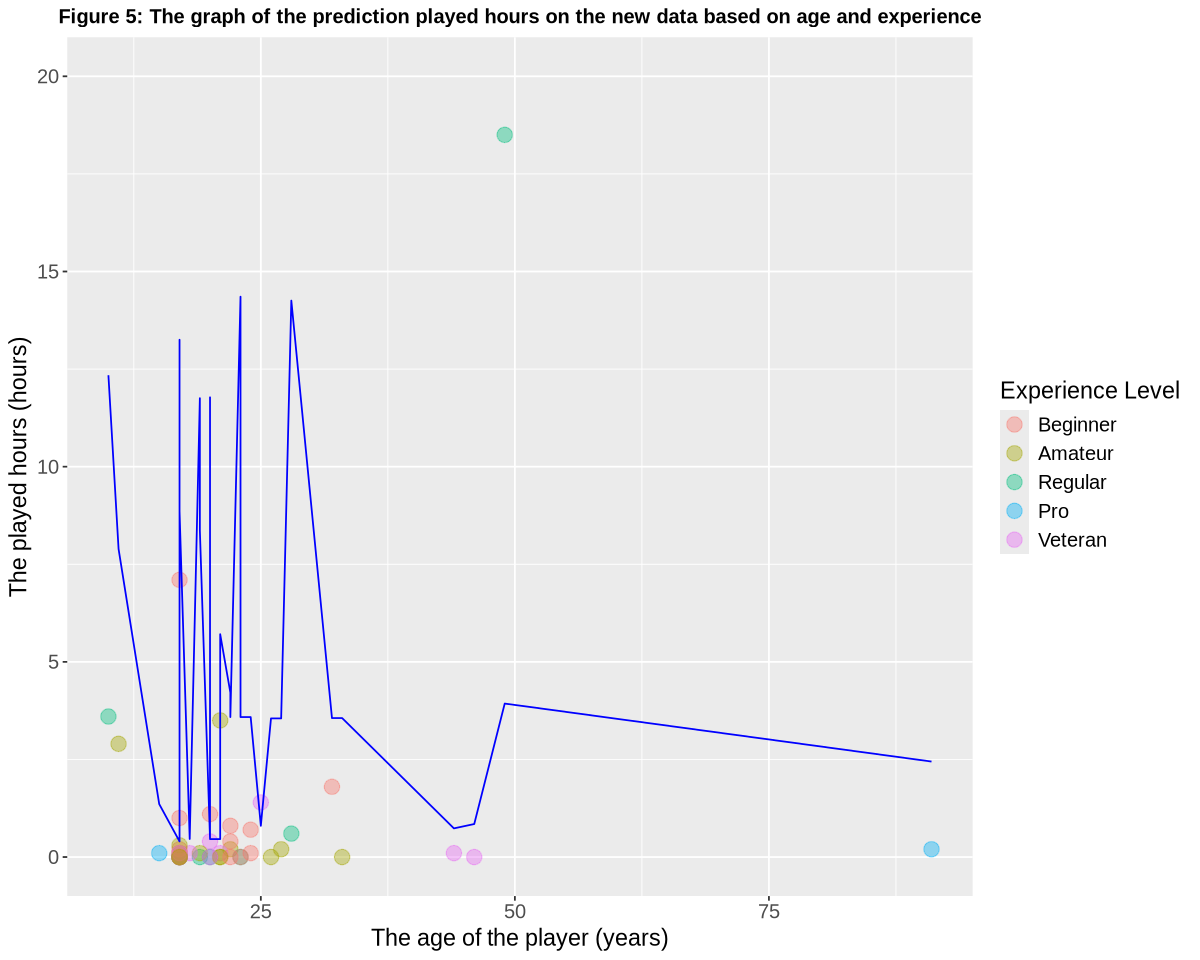

In [11]:
options(repr.plot.width = 10, repr.plot.height = 8)

player_testing_clean_prediction <- player_final_fit |>
                             predict(player_testing_clean) |>
                             bind_cols(player_testing_clean) 


player_testing_clean_plot <- ggplot(player_testing_clean_prediction, aes(x = age, y = played_hours, color = experience)) +
                    geom_point(alpha = 0.4, size = 4) +
                    labs(x = "The age of the player (years)",
                         y = "The played hours (hours)",
                         title = "Figure 5: The graph of the prediction played hours on the new data based on age and experience",
                         color = "Experience Level") +
                    geom_line(data = player_testing_clean_prediction, aes(x = age, y = .pred), color = "blue") +
                    theme(plot.title = element_text(size = 12, hjust = 0.5, face = "bold"), 
                                 axis.title = element_text(size = 14),
                                 axis.text = element_text(size = 12),
                                 legend.title = element_text(size = 14),
                                 legend.text = element_text(size = 12)) +
                    ylim(0, 20)
 

player_testing_clean_plot

Next we are going to calculate the RMSE value to evaluate the quality of our prediction model.

In [12]:
player_testing_clean_summary <- player_testing_clean_prediction |>
                       metrics(truth = played_hours, estimate = .pred) |>
                       filter(.metric == 'rmse')

player_testing_clean_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,30.43677


This means the error will be around 30.79902, so our model is does a good job since the test error is close to the model error, which is 22. The error of our prediction model and the test error are close enough to show the reliability of our data. However, both errors are significant compared to the data values in the original dataset. This indicates that there isn’t a significant relationship between our parameters and the estimated variables.

## Discussion

1. Summarize

Based on the visualizations and analysis we conducted, it is evident that players aged between 10 and 30 are more likely to spend a greater amount of time playing the game. Furthermore, players with Amateur and Regular skill levels tend to dedicate more time to the game, with Regular players also showing less variation in playtime among individuals. However, the performance of our prediction model, which is based on experience level and age, does not yield satisfactory results when applied to the test data.


2. Same as Expected?

No, the result is different from what we initially expected. We expected players with more experience to have more playing hours since more experience can lead to greater satisfaction when playing the game. Several studies focus on how gaming satisfaction can lead to higher played hours. However, our result shows that players with higher experience did not contribute higher playing hours to the game. Surprisingly, players with regular experience levels result in the highest playing hours. In addition to this, we also conclude that there isn't a strong relationship between the age and the playing hours. This was not in line with or against our expectations because we did not have a specific idea about the relationship between age and playing hours. Since little research specifically focuses on this, especially Minecraft, we did not have expectations for that relationship. 

3. Impact of the Findings

Since players with regular experience tend to log the highest playing hours, these are the ones that build up the majority playing hours in the dataset. For future research, we would benefit from focusing on players with regular experience levels because they would contribute the most data for us to use for our research questions. In addition, the result also indicates that there isn't a significant relationship between age and play hours; this implies that age is not a factor that affects the time the players are willing to play the game. 

4. Future questions

Since the result shows that players with regular levels have the highest playing time, we’re curious about the times these players play the game in a day and the average playing time for these players. This can help us understand the playing habits of the majority and the time when most people play the game. Additionally, we can explore why players with higher experience levels do not exhibit longer playing hours and investigate the factors influencing this behavior.

## References

Johannes, Niklas, et al. “Video game play is positively correlated with well-being.” $Royal Society Open Science, vol. 8, no. 2$, Feb. 2021, https://doi.org/10.1098/rsos.202049. 

Johnson, Daniel, et al. “Motivations for videogame play: Predictors of time spent playing.” $Computers in Human Behavior, vol. 63$, Oct. 2016, pp. 805–812, https://doi.org/10.1016/j.chb.2016.06.028. 

“Minecraft.” IMDb, IMDb.com, www.imdb.com/title/tt2011970/awards/. 


Smith, Andrew. “Plaicraft.Ai Launch.” Pacific Laboratory for Artificial Intelligence, 30 Oct. 2024, plai.cs.ubc.ca/2023/09/27/plaicraft/. 

“Welcome to the Official Site of Minecraft.” Minecraft.Net, www.minecraft.net/en-us. 